# PypeCast - Simple example

### Import the essential classes

In [1]:
import pandas as pd
from pypecast.models import MLP, Simple_LSTM
from pypecast.models.Het_LSTM import MDN_Het_LSTM
from pypecast.features import BuildFeaturesSupervised
from pypecast.descriptor import SeriesDescriptor

Using TensorFlow backend.


In [2]:
df = pd.read_csv('monthly_milk.csv')

In [3]:
series = df.Production

### Descriptor

In [4]:
sd = SeriesDescriptor()

-> Visualization of the series data:


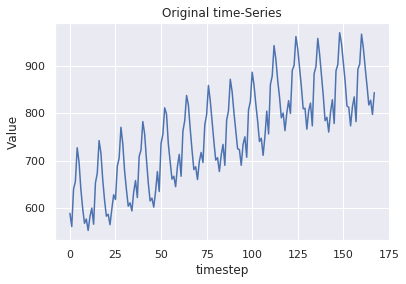

-> Description of the series data:
       Production
count  168.000000
mean   754.708333
std    102.204524
min    553.000000
25%    677.750000
50%    761.000000
75%    824.500000
max    969.000000
-------------------- Histogram --------------------


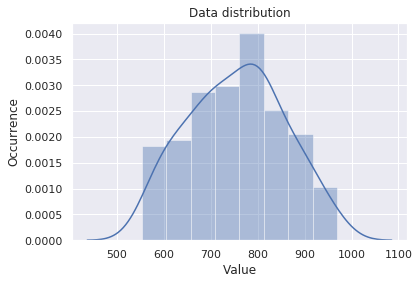

-> Autocorrelation and partial autocorrelation:


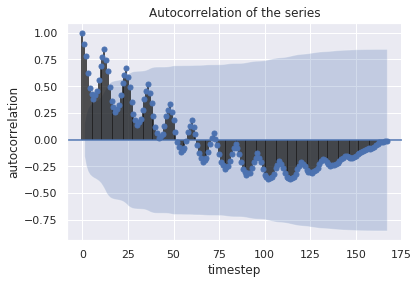

-> Checking for outliers:


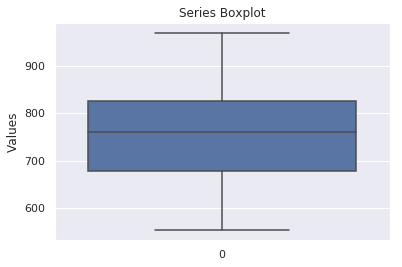

In [5]:
sd.full_report(data=series)

### Build features for supervised learning

In [6]:
n_lag = 10 #Defining the lag window (ANN input size)
n_seq = 1 #Defining the number of future timesteps to forecast

bf = BuildFeaturesSupervised(n_lag,n_seq, difference=True,scaler_type='std')

In [7]:
scaler, train, test = bf.transform_data(series)

### Define a PypeCast Model

In [8]:
model = MDN_Het_LSTM(n_lag, n_seq, n_distr=1)

#### Fit the model on training set

In [9]:
model.fit(train, n_batch = 10, n_epoch=100, early_stopping=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 10)        0                                            
__________________________________________________________________________________________________
LSTM_1 (LSTM)                   (None, 5)            320         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1)            6           LSTM_1[0][0]                     
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1)            6           LSTM_1[0][0]                     
__________________________________________________________________________________________________
dense_3 (D

#### Make forecasts in the test set and evaluate them

In [10]:
forecasts = model.forecast_series(test=test, scaler=scaler, orig_series=series)

In [11]:
model.evaluate_forecast(keep_rate=0.3,save_report=True, filename='../reports/MDN2.xls')

--------------------Forecast evaluation--------------------

Step t+1
stds: [0.12283798 0.09770281 0.26887795 0.690682   0.87069315 0.33939594
 0.56017536 0.31615916 0.5500584  0.15184687 0.12462101 0.04820055
 0.13721785 0.10098939 0.2760577  0.7848857  0.876637   0.2966665
 0.54305744 0.30622    0.56885964 0.14375664 0.12113521 0.04663236
 0.11936243 0.08626261 0.2326061  0.668106   0.8212744  0.34010032
 0.5616942  0.30031207 0.58634436 0.15391448 0.12950817 0.05247883
 0.15390809 0.10964173]
thres: [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1]
t+1 RMSE: 25.644777
t+1 MAE: 15.618999
t+1 MAPE: 1.886717
t+1 sMAPE: 0.018874
t+1 MAEk: 10.014428
------------------------------------------------------------

--------------------Naive forecast evaluation--------------------
Step t+1
t+1 RMSE: 75.221602
t+1 MAE: 52.026316
t+1 MAPE: 6.144490
t+1 sMAPE: 0.062261
------------------------------------------------------------

--------------------Evaluation for eac

thres: [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1]
Index 11 RMSE: 9.436626
Index 11 MAE: 9.436626
Index 11 MAPE: 1.083424
Index 11 sMAPE: 0.010776
Index 11 MAE Keep: 9.436626
------------------------------------------------------------
stds: [0.12283798 0.09770281 0.26887795 0.690682   0.87069315 0.33939594
 0.56017536 0.31615916 0.5500584  0.15184687 0.12462101 0.04820055
 0.13721785 0.10098939 0.2760577  0.7848857  0.876637   0.2966665
 0.54305744 0.30622    0.56885964 0.14375664 0.12113521 0.04663236
 0.11936243 0.08626261 0.2326061  0.668106   0.8212744  0.34010032
 0.5616942  0.30031207 0.58634436 0.15391448 0.12950817 0.05247883
 0.15390809 0.10964173]
thres: [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1]
Index 12 RMSE: 2.012242
Index 12 MAE: 2.012242
Index 12 MAPE: 0.226604
Index 12 sMAPE: 0.002269
Index 12 MAE Keep: 2.012242
------------------------------------------------------------
stds: [0.12283798 0.0977028

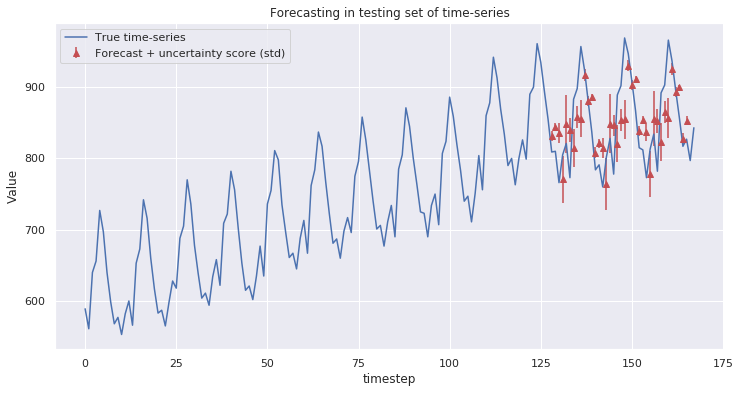

In [12]:
import matplotlib.pyplot as plt
model.plot_forecasts(forecasts=forecasts,series=series, test=test)